A classification decision tree is a machine learning model used to classify data into predefined categories based on input features. It is a tree-like structure where each internal node represents a decision or test based on a feature, each branch corresponds to the outcome of the decision, and each leaf node represents a class label.   
Classification decision trees are used to address classification problems, where the goal is to assign items or instances to predefined categories or classes based on input features. These trees work by splitting the data into subsets based on feature values, using decision rules derived from the data. The splitting continues until a stopping criterion is met, resulting in a tree structure where each leaf represents a class.
Examples: 
1.Medical Diagnosis
Problem: Predict whether a patient has a specific disease (e.g., diabetes) based on input features such as age, blood sugar levels, BMI, and family history.
Explanation: A classification tree splits the patients into groups using thresholds like "Is blood sugar level > X?" and "Is BMI > Y?". At each node, the tree uses the most informative feature to partition the data until the leaves represent either "disease" or "no disease."
2.Credit Risk Assessment
Problem: Determine whether a loan applicant is a good or bad credit risk based on factors such as income, credit history, employment status, and debt-to-income ratio.
Explanation: The decision tree might include rules like "Is the applicant's credit score > Y?" or "Is the debt-to-income ratio < Z?" to classify applicants into "low risk" or "high risk."
3.Spam Email Detection
Problem: Classify emails as "spam" or "not spam" based on features like the presence of specific keywords, email length, or the sender's domain.
Explanation: A tree could have splits such as "Does the email contain the word 'lottery'?" or "Is the sender's domain in a known spam list?" to make the classification.
VS Multiple Linear Regression:
Classification decision tree:
Designed for classification tasks: Predicts discrete labels (e.g., "spam" vs. "not spam").
How it Predicts:
Traversal:
Starting at the root node, the model evaluates the input data against the splitting criteria (e.g., "Is age > 30?").
Based on the result, it follows a branch to the next node.
Recursive Decision:
At each subsequent node, the process is repeated until a leaf node is reached.
Output:
The class label (e.g., "A" or "B") associated with the leaf node is the prediction.
If probabilities are needed, the fraction of training data in that leaf corresponding to each class can be provided.
Multiple linear regression:

Classification decision trees and multiple linear regression are both predictive models, but they work in fundamentally different ways and are designed for different types of tasks. Here’s a comparison of how each makes predictions:

1. Classification Decision Tree: Making Classification Predictions
Purpose:
Designed for classification tasks: Predicts discrete labels (e.g., "spam" vs. "not spam").
How it Predicts:
1)Traversal:
Starting at the root node, the model evaluates the input data against the splitting criteria (e.g., "Is age > 30?").
Based on the result, it follows a branch to the next node.
2)Recursive Decision:
At each subsequent node, the process is repeated until a leaf node is reached.
3)Output:
The class label (e.g., "A" or "B") associated with the leaf node is the prediction.
If probabilities are needed, the fraction of training data in that leaf corresponding to each class can be provided.

2. Multiple Linear Regression: Making Regression Predictions
Purpose:
Designed for regression tasks: Predicts continuous values (e.g., house prices, stock prices).
How it Predicts:
Mathematical Formula:y=β0+β1x1+β2x2+...+βnxn
Prediction:
Plug the input feature values into the formula to predict outcome y
Output:
A single continuous value as the prediction.

Q2

Accuracy: 
Quality Control in Manufacturing: Identifying defective products in a production line where defective items are rare but not extremely uncommon.
Reasons: In this case, both TP and TN, which means correctly identifying defective products and correctly identifying non-defective products, respectively, are equally important. The class distribution is also relatively balanced. 
Accuracy is not applicable when datasets are imbalanced or the costs of errors are unequal.

Sensitivity:
Medical Diagnosis: Diagnosing serious conditions such as cancer, COVID-19, or other life-threatening diseases. 
Reasons: Missing a true positive case can lead to severe consequences such as delayed treatment or worsened outcomes. Sensitivity metrics ensures most affected individuals are identified, even if it means some false positives.
Sensitivity is not appropriate when false positives carry significant costs or consequences, since it may not be sufficient.

Specificity:
Spam email detection for important communications: Filtering spam emails in a professional or emergency email system (e.g. emails from a hospital or legal office).
Reasons: False positives (misclassifying legitimate emails as spam) can result in important information being missed. High specificity ensures genuine emails are not incorrectly flagged as spam.
Specificity is not applicable in situations where missing true positives have severe consequences. These situations include cancer diagnosis, cybersecurity threats, etc..

Precision:
Targeted marketing campaigns: Identifying potential customers for a promotional offer
Reasons: False positives mean wasting resources by marketing into uninterested customers. High precision ensures that those targeted are genuinely interested in the product or service, therefore maximizing the return of the investment.
Precision alone is insufficient in scenarios where false negatives are critical. For example: cancer screening and search-and-rescue operations.

Q3

In [8]:
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, recall_score, make_scorer
import graphviz as gv

url = "https://raw.githubusercontent.com/pointOfive/STA130_F23/main/Data/amazonbooks.csv"
ab = pd.read_csv(url, encoding="ISO-8859-1")
# create `ab_reduced_noNaN` based on the specs above

# Remove rows with any missing values
ab_clean = ab.dropna()

# Remove 'weight_oz', 'width', and 'height' columns
ab_reduced_noNaN = ab_clean.drop(columns=['Weight_oz', 'Width', 'Height'])

# Convert 'Pub year' and 'NumPages' to integer types
ab_reduced_noNaN['Pub year'] = ab_reduced_noNaN['Pub year'].astype(int)
ab_reduced_noNaN['NumPages'] = ab_reduced_noNaN['NumPages'].astype(int)

# Convert 'Hard_or_Paper' to categorical type
ab_reduced_noNaN['Hard_or_Paper'] = ab_reduced_noNaN['Hard_or_Paper'].astype('category')

Q4

In [28]:
# Create the training set with 80% of the data
ab_reduced_noNaN_train = ab_reduced_noNaN.sample(frac=0.8, random_state=42)

# Create the testing set with the remaining 20% of the data
ab_reduced_noNaN_test = ab_reduced_noNaN.drop(ab_reduced_noNaN_train.index)

# Verify the sizes of the resulting datasets
print(f"Total dataset size: {ab_reduced_noNaN.shape[0]} rows")
print(f"Training set size: {ab_reduced_noNaN_train.shape[0]} rows")
print(f"Testing set size: {ab_reduced_noNaN_test.shape[0]} rows")

Total dataset size: 310 rows
Training set size: 248 rows
Testing set size: 62 rows


In [29]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt

y = pd.get_dummies(ab_reduced_noNaN["Hard_or_Paper"])['H']
X = ab_reduced_noNaN[['List Price']]

# Feature and target variables for the training set
X_train = ab_reduced_noNaN_train[['List Price']]
y_train = pd.get_dummies(ab_reduced_noNaN_train['Hard_or_Paper'])['H']

# Feature and target variables for the testing set
X_test = ab_reduced_noNaN_test[['List Price']]
y_test = pd.get_dummies(ab_reduced_noNaN_test['Hard_or_Paper'])['H']

# Initialize the classifier with max_depth=2
clf = DecisionTreeClassifier(max_depth=2, random_state=42)

# Train the classifier
clf.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = clf.predict(X_test)

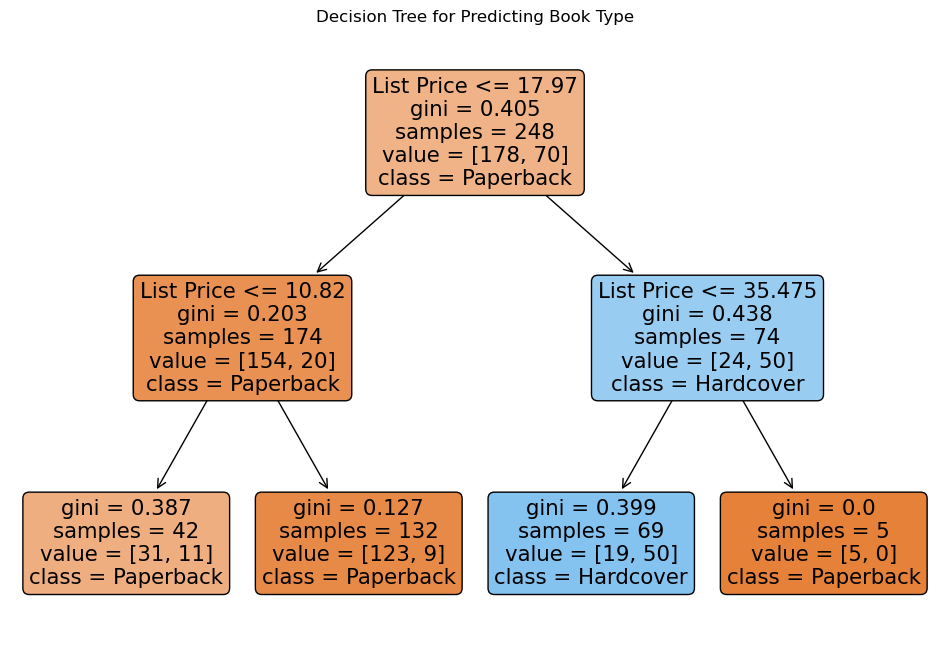

In [30]:
# Plot the decision tree
plt.figure(figsize=(12, 8))
tree.plot_tree(
    clf, 
    feature_names=['List Price'], 
    class_names=['Paperback', 'Hardcover'], 
    filled=True, 
    rounded=True
)
plt.title('Decision Tree for Predicting Book Type')
plt.show()

Interpretations of the graph:
Example predictions:
Book A with List Price = $10.00
Decision: $10.00 <= $10.82 <= $17.97
Prediction: 'Paperback'
Book B with List Price = $25.00
Decision: $25.00 >= $17.97 -> $25.00 <= $35.475
Prediction: 'Hardcover'

Q5

NumPages        int64
Thick         float64
List Price    float64
dtype: object
Accuracy: 0.85
Recall: 0.74


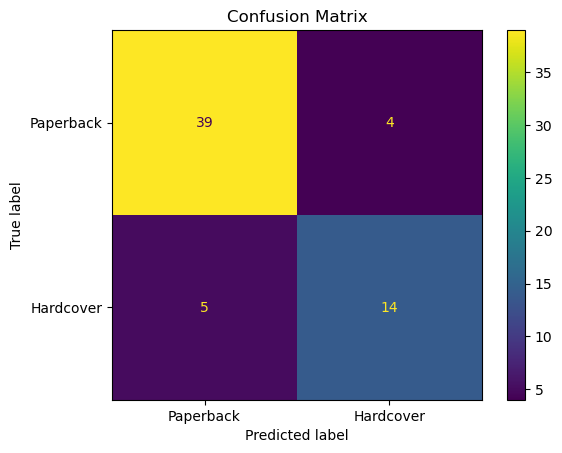

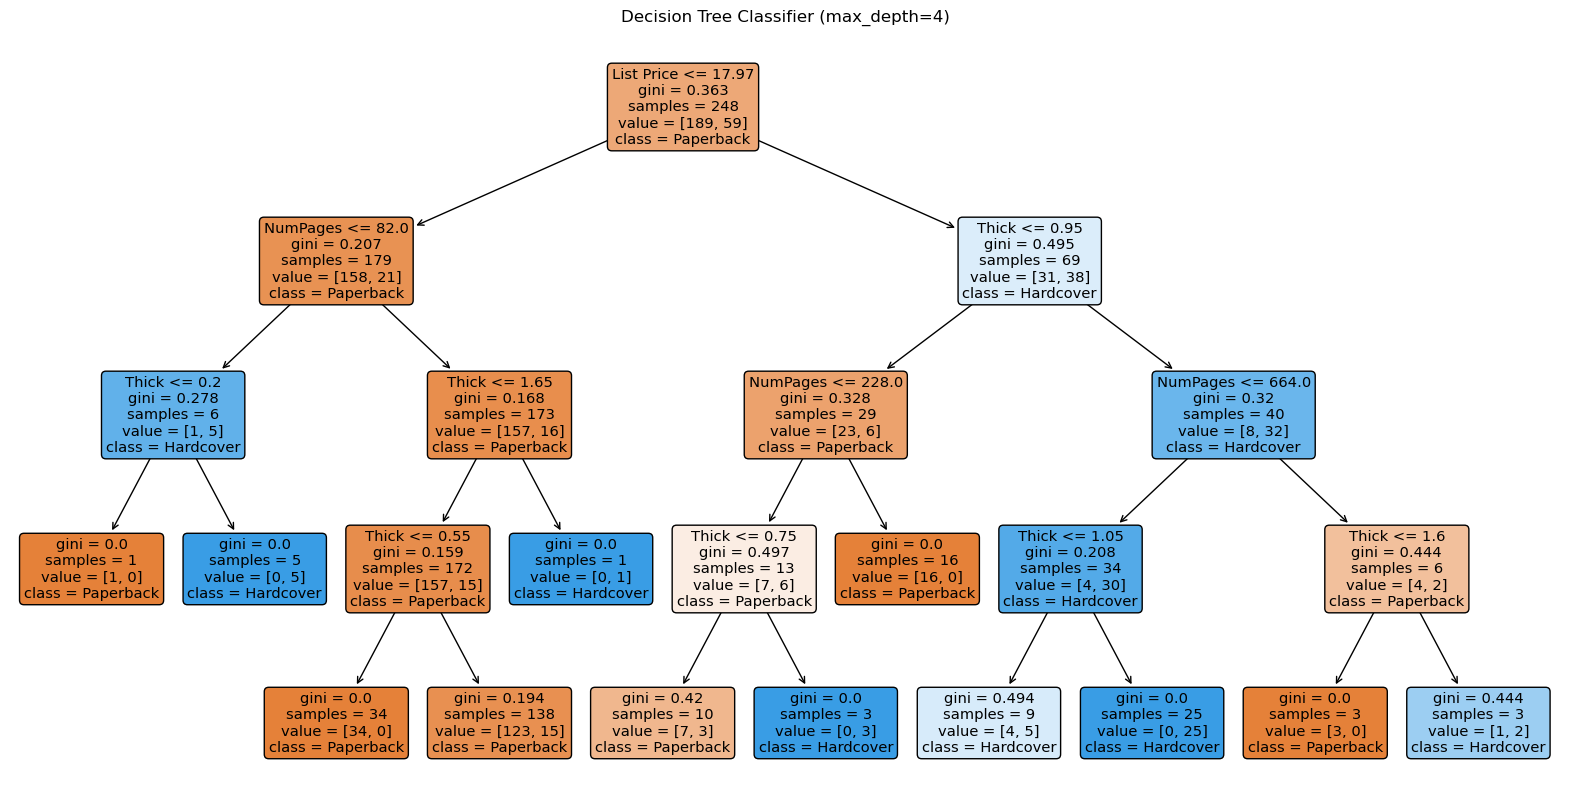

'decision_tree_max_depth_4.pdf'

In [13]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn import tree
import graphviz

# Check data types of the selected features
print(ab_reduced_noNaN[['NumPages', 'Thick', 'List Price']].dtypes)
# Convert to appropriate numerical types if not already
ab_reduced_noNaN['NumPages'] = ab_reduced_noNaN['NumPages'].astype(float)
ab_reduced_noNaN['Thick'] = ab_reduced_noNaN['Thick'].astype(float)
ab_reduced_noNaN['List Price'] = ab_reduced_noNaN['List Price'].astype(float)

X = ab_reduced_noNaN[['NumPages', 'Thick', 'List Price']]

# Target variable: 'Hard_or_Paper' encoded as 1 for 'H' (Hardcover), 0 for 'P' (Paperback)
y = pd.get_dummies(ab_reduced_noNaN['Hard_or_Paper'])['H']
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
clf = DecisionTreeClassifier(max_depth=4, random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Calculate recall
recall = recall_score(y_test, y_pred)
print(f"Recall: {recall:.2f}")
# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Paperback', 'Hardcover'])
disp.plot()
plt.title('Confusion Matrix')
plt.show()
plt.figure(figsize=(20, 10))
tree.plot_tree(
    clf, 
    feature_names=['NumPages', 'Thick', 'List Price'], 
    class_names=['Paperback', 'Hardcover'], 
    filled=True, 
    rounded=True
)
plt.title('Decision Tree Classifier (max_depth=4)')
plt.show()
# Export as dot file
dot_data = tree.export_graphviz(
    clf, out_file=None, 
    feature_names=['NumPages', 'Thick', 'List Price'],  
    class_names=['Paperback', 'Hardcover'],  
    filled=True, rounded=True,  
    special_characters=True
)  

# Draw graph
graph = graphviz.Source(dot_data)  

# Render as PDF or PNG
graph.render("decision_tree_max_depth_4")

Example Prediction:
Book with following specs:
'NumPages': 200 pages
'Thick': 0.8 inches
'List Price': $15.00
Prediction steps: right node -> left node -> right node
Prediction result: paperback

Q6

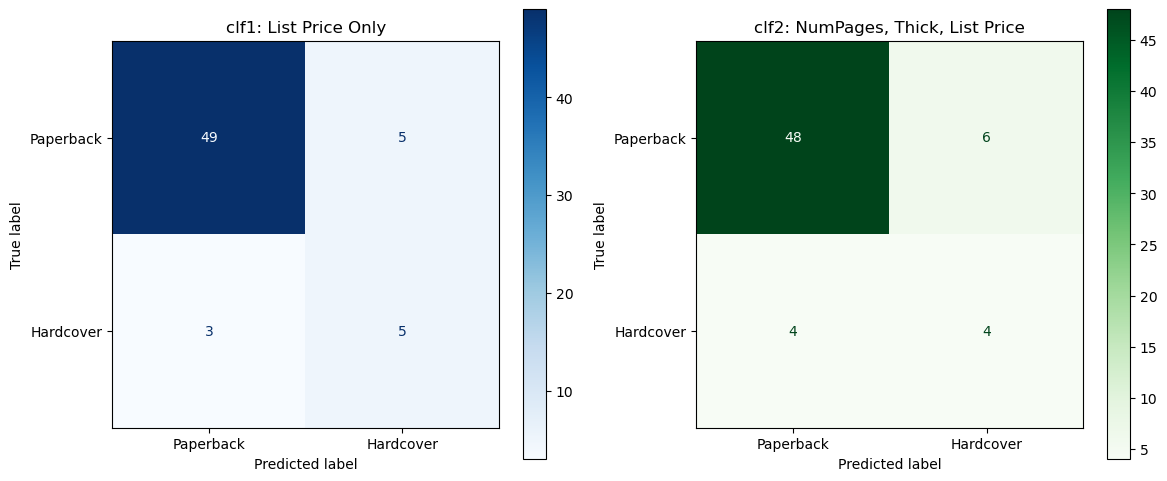

clf1 Performance Metrics:
Accuracy: 0.87
Sensitivity (Recall): 0.62
Specificity: 0.91
Precision: 0.50
F1 Score: 0.56

clf2 Performance Metrics:
Accuracy: 0.84
Sensitivity (Recall): 0.50
Specificity: 0.89
Precision: 0.40
F1 Score: 0.44


In [24]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (
    accuracy_score, recall_score, precision_score, f1_score,
    confusion_matrix, ConfusionMatrixDisplay
)

# Assuming ab_reduced_noNaN_train and ab_reduced_noNaN_test are defined

# Prepare feature and target variables for clf1
X1_train = ab_reduced_noNaN_train[['List Price']]
y1_train = pd.get_dummies(ab_reduced_noNaN_train['Hard_or_Paper'])['H']

X1_test = ab_reduced_noNaN_test[['List Price']]
y1_test = pd.get_dummies(ab_reduced_noNaN_test['Hard_or_Paper'])['H']

# Train clf1
clf1 = DecisionTreeClassifier(max_depth=2, random_state=42)
clf1.fit(X1_train, y1_train)

# Make predictions with clf1
y1_pred = clf1.predict(X1_test)

# Confusion matrix for clf1
cm1 = confusion_matrix(y1_test, y1_pred)
disp1 = ConfusionMatrixDisplay(confusion_matrix=cm1, display_labels=['Paperback', 'Hardcover'])

# Prepare feature and target variables for clf2
X2_train = ab_reduced_noNaN_train[['NumPages', 'Thick', 'List Price']]
y2_train = y1_train  # Target variable is the same

X2_test = ab_reduced_noNaN_test[['NumPages', 'Thick', 'List Price']]
y2_test = y1_test

# Train clf2
clf2 = DecisionTreeClassifier(max_depth=4, random_state=42)
clf2.fit(X2_train, y2_train)

# Make predictions with clf2
y2_pred = clf2.predict(X2_test)

# Confusion matrix for clf2
cm2 = confusion_matrix(y2_test, y2_pred)
disp2 = ConfusionMatrixDisplay(confusion_matrix=cm2, display_labels=['Paperback', 'Hardcover'])

# Plot both confusion matrices
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# clf1 confusion matrix
disp1.plot(cmap=plt.cm.Blues, ax=axes[0], values_format='d')
axes[0].set_title('clf1: List Price Only')

# clf2 confusion matrix
disp2.plot(cmap=plt.cm.Greens, ax=axes[1], values_format='d')
axes[1].set_title('clf2: NumPages, Thick, List Price')

plt.tight_layout()
plt.show()

# Confusion matrix components for clf1
tn1, fp1, fn1, tp1 = cm1.ravel()

print(f"clf1 Performance Metrics:")
print(f"Accuracy: {accuracy1:.2f}")
print(f"Sensitivity (Recall): {sensitivity1:.2f}")
print(f"Specificity: {specificity1:.2f}")
print(f"Precision: {precision1:.2f}")
print(f"F1 Score: {f1_score1:.2f}")

# Confusion matrix components for clf2
tn2, fp2, fn2, tp2 = cm2.ravel()


print(f"\nclf2 Performance Metrics:")
print(f"Accuracy: {accuracy2:.2f}")
print(f"Sensitivity (Recall): {sensitivity2:.2f}")
print(f"Specificity: {specificity2:.2f}")
print(f"Precision: {precision2:.2f}")
print(f"F1 Score: {f1_score2:.2f}")

Q7

The difference between the two confusion matrices are caused by many reasons:
1. Model complexity: First model is a simpler one with only one feature, and decisions are based solely on the list price of books, while the second model is more complex with three features (num pages, thickness and list price).
2. The second model is expected to have higher accuracy due to the additional features providing more information. Not only will the additional features enhance predictive power, it will also improve decision boundaries and reduce overfitting to a single feature.
These are why the second model tend to perform better as reflected on its confusion matrix.

Q8

In [26]:
# Assuming clf2 is already trained
import numpy as np

# Extract feature importances
importances = clf2.feature_importances_

# Extract feature names
feature_names = clf2.feature_names_in_

# Display feature importances with their corresponding feature names
print("Feature importances for clf2:")
for name, importance in zip(feature_names, importances):
    print(f"Feature: {name}, Importance: {importance:.4f}")
    

Feature importances for clf2:
Feature: NumPages, Importance: 0.2572
Feature: Thick, Importance: 0.1858
Feature: List Price, Importance: 0.5570


In linear regression, coefficients quantify the exact change in the target variable for a one-unit change in a predictor, assuming all other variables remain constant; they provide both magnitude and direction of the relationship. In contrast, feature importances in decision trees measure the relative contribution of each feature to the model’s predictive power by assessing the reduction in impurity they provide, but they do not offer explicit coefficients or indicate the direction of influence. Therefore, while linear regression coefficients allow for direct interpretation of effect sizes, feature importances in decision trees give a ranked indication of feature relevance without specific effect magnitudes or directions.

1. https://chatgpt.com/share/6740e36e-14d4-8001-bc7d-1335e35860e7
2. https://chatgpt.com/share/6740e376-8204-8001-abca-4ca4084adc1f